In [1]:
#!pip install tensorflow==2.0.0-rc1
#!pip install tensorflow-gpu==2.0.0-rc1

## 1) In this task, you'll build an ANN and train and test it using the MNIST data. This ANN should consist of two hidden layers and one output layer. All of the hidden layers should be dense. The first layer and the second layer should have neuron sizes of 32 and 16, respectively. Train this model for 20 epochs, and compare your training and test set performance with the example in the checkpoint. Is there any difference? If so, why?



In [2]:
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.datasets import mnist

Then, load the data and do the preprocessing:

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

input_dim = 784  # 28*28
output_dim = nb_classes = 10
batch_size = 128
nb_epoch = 20

X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Next, one-hot code your target variable using the `to_categorical()` function from the `keras.utils` module:

In [4]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

Now, check the size of the dataset:

In [5]:
X_train[0].shape

(784,)

As you can see, the size of each image is 784. In fact, all images in *MNIST* are 28 by 28 pixels, and 784 is just the result of multiplying 28 by 28. So, the data that you have is a flattened version of the images, where each row in the 28x28 matrix is concatenated side by side. 

Now, plot some images and see what they look like:

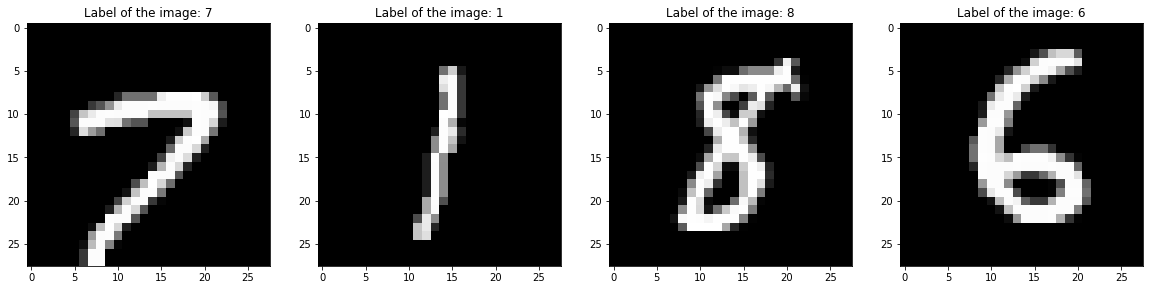

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

plt.subplot(141)
plt.imshow(X_train[123].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[123]))

plt.subplot(142)
plt.imshow(X_train[124].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[124]))

plt.subplot(143)
plt.imshow(X_train[125].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[125]))

plt.subplot(144)
plt.imshow(X_train[126].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[126]))

plt.show()

You're now ready to jump into building the ANN model.

### Defining the model

As mentioned before, you'll build your model using the `Sequential()` class of the `keras.models` module. First, create your model as follows:
```python
model = Sequential()
```
Then you can start to add layers to your `model` object one by one (that is, sequentially). The layer type that you'll use is called the dense layer, and you can import it from the `keras.layers` module.

In [7]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model = Sequential()
# The first dense layer
model.add(Dense(32, input_shape=(784,), activation="relu"))
# The second dense layer
model.add(Dense(16, activation="relu"))
# The last layer is the output layer
model.add(Dense(10, activation="softmax"))

Note that above, the neuron size of the output layer is set to `10`. This is because *MNIST* has 10 classes. The code also sets the activation function of the output layer to `softmax`. Later, you'll explore why softmax is used as the activation function in the output layer. But for now, know that when you give an image as an input to the model, your model will produce 10 probabilities for each of the 10 classes in the *MNIST* data. The largest probability class will be the prediction of the model.

You can look at the structure of your ANN model using the `summary()` method of your `model` object:

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


### Compiling the model

Now you can compile your model. When compiling the model, define three things:

1. **The optimizer that will be used in the training:** If you don't know about optimizers in deep learning, don't worry. You just need to use one in this checkpoint, and you'll learn about optimizers later in this module.
2. **The loss function:** It's necessary to specify a loss function for a model. Training algorithms use this loss function and try to minimize it during the training. This will also be covered in the next checkpoint.
3. **The metric to measure the training performance of your model:** In this example, you use the accuracy metric, because your task is a classification task and your dataset is a balanced one.

In [9]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

You're now ready to train the model. Training a model in Keras is done by calling the `fit()` method of the `model` object. In the following, you train your model using the following specifications:

In [10]:
# Setting `verbose=1` prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 18us/sample - loss: 1.7496 - accuracy: 0.4234
Epoch 2/20
60000/60000 [==============================] - 1s 12us/sample - loss: 0.7188 - accuracy: 0.8135
Epoch 3/20
60000/60000 [==============================] - 1s 12us/sample - loss: 0.4725 - accuracy: 0.8683
Epoch 4/20
60000/60000 [==============================] - 1s 13us/sample - loss: 0.3987 - accuracy: 0.8880
Epoch 5/20
60000/60000 [==============================] - 1s 12us/sample - loss: 0.3606 - accuracy: 0.8979
Epoch 6/20
60000/60000 [==============================] - 1s 12us/sample - loss: 0.3361 - accuracy: 0.9043
Epoch 7/20
60000/60000 [==============================] - 1s 12us/sample - loss: 0.3191 - accuracy: 0.9089
Epoch 8/20
60000/60000 [==============================] - 1s 12us/sample - loss: 0.3054 - accuracy: 0.9127
Epoch 9/20
60000/60000 [==============================] - 1s 12us/sample - loss: 0.2942 - accuracy: 0.9161
Epoch 10/20
60

### Evaluating the model

The last step is to evaluate the model using the test set that you set apart before. For this purpose, use the `evaluate()` method of the `model` object.

In [11]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.21276673160791398
Test accuracy: 0.9378


## It has a little bit less accuracy than the example model (94% vs 97%), probably because it has less neurons in the model layers

## 2) In this task, build another ANN. This ANN should have five hidden layers and one output layer. All of the layers should be dense. The neuron numbers for the hidden layers should be 1024, 512, 256, 128, and 64. Train this model for 20 epochs, and test it using the same data from the previous task. Then compare your results. Is there any difference? If so, why?

In [12]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

input_dim = 784  # 28*28
output_dim = nb_classes = 10
batch_size = 128
nb_epoch = 20

X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Next, one-hot code your target variable using the `to_categorical()` function from the `keras.utils` module:

In [13]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

Now, check the size of the dataset:

In [14]:
X_train[0].shape

(784,)

### Defining the model

As mentioned before, you'll build your model using the `Sequential()` class of the `keras.models` module. First, create your model as follows:
```python
model = Sequential()
```
Then you can start to add layers to your `model` object one by one (that is, sequentially). The layer type that you'll use is called the dense layer, and you can import it from the `keras.layers` module.

In [15]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model = Sequential()
# The first dense layer
model.add(Dense(1024, input_shape=(784,), activation="relu"))
# The second dense layer
model.add(Dense(512, activation="relu"))
# The third dense layer
model.add(Dense(256, activation="relu"))
# The fourth dense layer
model.add(Dense(128, activation="relu"))
# The fourth dense layer
model.add(Dense(64, activation="relu"))
# The last layer is the output layer
model.add(Dense(10, activation="softmax"))

Note that above, the neuron size of the output layer is set to `10`. This is because *MNIST* has 10 classes. The code also sets the activation function of the output layer to `softmax`. Later, you'll explore why softmax is used as the activation function in the output layer. But for now, know that when you give an image as an input to the model, your model will produce 10 probabilities for each of the 10 classes in the *MNIST* data. The largest probability class will be the prediction of the model.

You can look at the structure of your ANN model using the `summary()` method of your `model` object:

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 1,501,770
Trainable params: 1,501,770
Non-trainable params: 0
____________________________________________

### Compiling the model

Now you can compile your model. When compiling the model, define three things:

1. **The optimizer that will be used in the training:** If you don't know about optimizers in deep learning, don't worry. You just need to use one in this checkpoint, and you'll learn about optimizers later in this module.
2. **The loss function:** It's necessary to specify a loss function for a model. Training algorithms use this loss function and try to minimize it during the training. This will also be covered in the next checkpoint.
3. **The metric to measure the training performance of your model:** In this example, you use the accuracy metric, because your task is a classification task and your dataset is a balanced one.

In [17]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

You're now ready to train the model. Training a model in Keras is done by calling the `fit()` method of the `model` object. In the following, you train your model using the following specifications:

In [18]:
# Setting `verbose=1` prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 95us/sample - loss: 1.2588 - accuracy: 0.6668
Epoch 2/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3771 - accuracy: 0.8944
Epoch 3/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2813 - accuracy: 0.9195
Epoch 4/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2363 - accuracy: 0.9313
Epoch 5/20
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2038 - accuracy: 0.9412ETA: 0s - loss: 0.2046 - 
Epoch 6/20
60000/60000 [==============================] - 5s 91us/sample - loss: 0.1806 - accuracy: 0.9476
Epoch 7/20
60000/60000 [==============================] - 5s 88us/sample - loss: 0.1612 - accuracy: 0.9531
Epoch 8/20
60000/60000 [==============================] - 5s 88us/sample - loss: 0.1450 - accuracy: 0.9578
Epoch 9/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.1318 - accura

### Evaluating the model

The last step is to evaluate the model using the test set that you set apart before. For this purpose, use the `evaluate()` method of the `model` object.

In [19]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.0810042532064952
Test accuracy: 0.9737


## Much better accuracy with this model (almost 98%), more layers and more neurons per layer